# 거리두기 확인하기

## 문제
면접 때 아래와 같은 규칙으로 대기실에 거리를 두고 앉도록 안내 중임
 - 대기실은 5개이며, 각 대기실은 5x5 크기
 - 거리두기를 위하여 응시자들 끼리는 맨해튼 거리1가 2 이하로 앉을 수 없음
 - 단 응시자가 앉아있는 자리 사이가 파티션으로 막혀 있을 경우에는 허용
각 대기실별로 거리두기를 지키고 있으면 1을, 한 명이라도 지키지 않고 있으면 0을 배열에 담아 return
<br><br>
input : 2차원 배열 , output : 정수 배열

#### <조건>
 - places의 행 길이(대기실 개수) = 5
 - places의 열 길이(대기실 세로 길이) = 5 
 - places의 원소는 P,O,X로 이루어진 문자열 <br>
   P는 응시자가 앉아있는 자리 <br>
   O는 빈 테이블을 의미 <br>
   X는 파티션을 의미
 - 입력으로 주어지는 5개 대기실의 크기는 모두 5x5 
 - places에 담겨 있는 5개 대기실의 순서대로, 거리두기 준수 여부를 차례대로 배열에 담아서 return <br>
   각 대기실 별로 모든 응시자가 거리두기를 지키고 있으면 1을, 한 명이라도 지키지 않고 있으면 0
   
#### <예시>

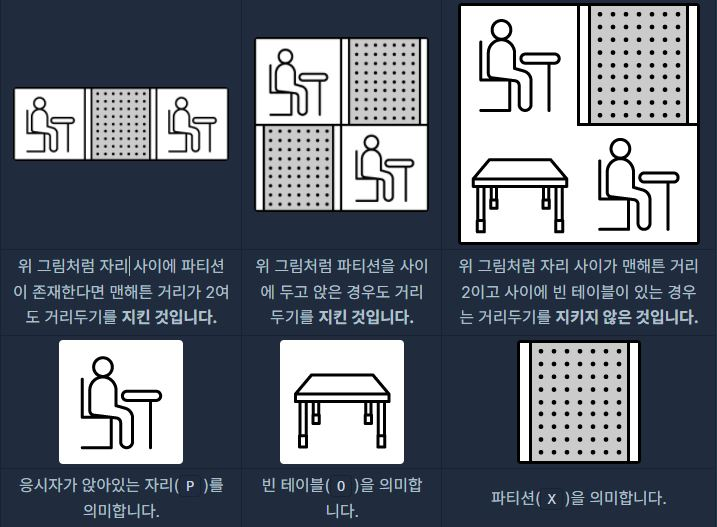

https://programmers.co.kr/learn/courses/30/lessons/81302#fn1

## 풀이
 - 각 고사실을 하나씩 check함수를 이용해서 확인하고 결과를 return해줘서 answer에 누적
 - 'P'의 위치를 2차원 배열의 인덱스로 뽑아내서 p_loc에 저장
 - p_loc에서 'P'의 위치를 비교하면서 두 'P'의 사이의 거리가 1인 경우에는 무조건 0
 - 2인 경우에는 4가지 종류의 가능성을 검사해봄
   1. 'P_P'인 경우 중간에 파티션의 여부에 따라서 없을 경우 바로 0을 return
   2. 세로로 1번인 경우에도 1번과 마찬가지로 처리
   3. 대각선으로 사람이 앉은 경우 방향에 따라서 나누어서 처리해줌
 - 모든 고사실을 다 처리해주면 최종의 숫자 배열을 return

In [135]:
def solution(places):
    answer = []
    
    while(places):
        place = places.pop(0)
        
        place = [list(i) for i in place]
        
        answer.append(check(place))
        
    return answer
        

def check(place):
    p_loc = [(i,j) for i in range(len(place)) for j in range(len(place[i])) if place[i][j] == 'P']
    
    for i in range(len(p_loc)):
        for j in range(i, len(p_loc)):
            if p_loc[i] != p_loc[j]:
                distance = abs(p_loc[i][0] - p_loc[j][0]) + abs(p_loc[i][1] - p_loc[j][1])
                if distance == 2:
                    if abs(p_loc[i][1] - p_loc[j][1]) == 2 and place[p_loc[i][0]][(p_loc[j][1]+p_loc[i][1])//2] != 'X': return 0
                    if abs(p_loc[i][0] - p_loc[j][0]) == 2 and place[(p_loc[j][0]+p_loc[i][0])//2][p_loc[i][1]] != 'X': return 0
                    if p_loc[j][1] - p_loc[i][1] == 1: 
                        if place[min(p_loc[i][0], p_loc[j][0])][max(p_loc[i][1], p_loc[j][1])] != 'X' or  place[max(p_loc[i][0], p_loc[j][0])][min(p_loc[i][1], p_loc[j][1])] != 'X':return 0 
                    if p_loc[i][1] - p_loc[j][1] == 1:
                        if place[min(p_loc[i][0], p_loc[j][0])][min(p_loc[i][1], p_loc[j][1])] != 'X' or  place[max(p_loc[i][0], p_loc[j][0])][max(p_loc[i][1], p_loc[j][1])] != 'X':
                            return 0
                        
                if distance == 1: return 0
    return 1

In [137]:
places = [["POOOP", "OXXOX", "OPXPX", "OOXOX", "POXXP"], ["POOPX", "OXPXP", "PXXXO", "OXXXO", "OOOPP"], ["PXOPX", "OXOXP", "OXPOX", "OXXOP", "PXPOX"], ["OOOXX", "XOOOX", "OOOXX", "OXOOX", "OOOOO"], ["PXPXP", "XPXPX", "PXPXP", "XPXPX", "PXPXP"]]

solution(places)

[1, 0, 1, 1, 1]

간략하고 보기 쉽게 짜여진 코드<br>
접근 방식은 같으나 변수를 어떻게 활용하냐가 중요한듯...<br>
enumerate를 활용해서 쉽게 인덱스 번호를 뽑아낼 수 있음을 기억해두자..!

In [136]:
def check(place):
    for irow, row in enumerate(place):
        for icol, cell in enumerate(row):
            if cell != 'P':
                continue
            if irow != 4 and place[irow + 1][icol] == 'P':
                return 0
            if icol != 4 and place[irow][icol + 1] == 'P':
                return 0
            if irow < 3 and place[irow + 2][icol] == 'P' and place[irow + 1][icol] != 'X':
                return 0
            if icol < 3 and place[irow][icol + 2] == 'P' and place[irow][icol + 1] != 'X':
                return 0
            if irow != 4 and icol != 4 and place[irow + 1][icol + 1] == 'P' and (place[irow + 1][icol] != 'X' or place[irow][icol + 1] != 'X'):
                return 0
            if irow != 4 and icol != 0 and place[irow + 1][icol - 1] == 'P' and (place[irow + 1][icol] != 'X' or place[irow][icol - 1] != 'X'):
                return 0
    return 1

def solution(places):
    return [check(place) for place in places]